In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, accuracy_score, make_scorer, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

### 1. EDA

#### Učitavanje podataka

In [90]:
dataset = pd.read_csv("weatherAUS.csv")

In [91]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [92]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [93]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [94]:
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Čišćenje podataka i sređivanje podataka

In [95]:
dataset = dataset.drop(['Date', 'Location'], axis=1)

In [96]:
dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [97]:
dataset.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

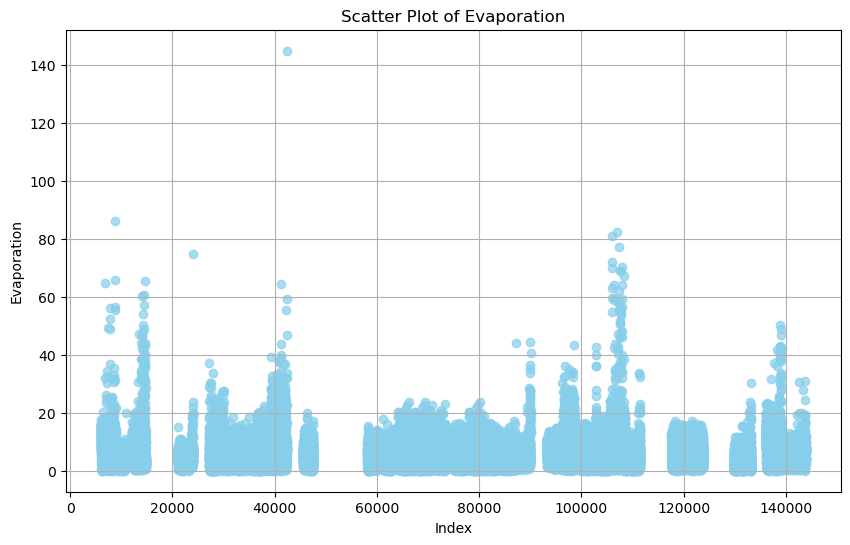

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset["Evaporation"], color='skyblue', alpha=0.7)

plt.title('Scatter Plot of Evaporation')
plt.xlabel('Index')
plt.ylabel('Evaporation')
plt.grid(True)
plt.show()

In [99]:
dataset["Evaporation"].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

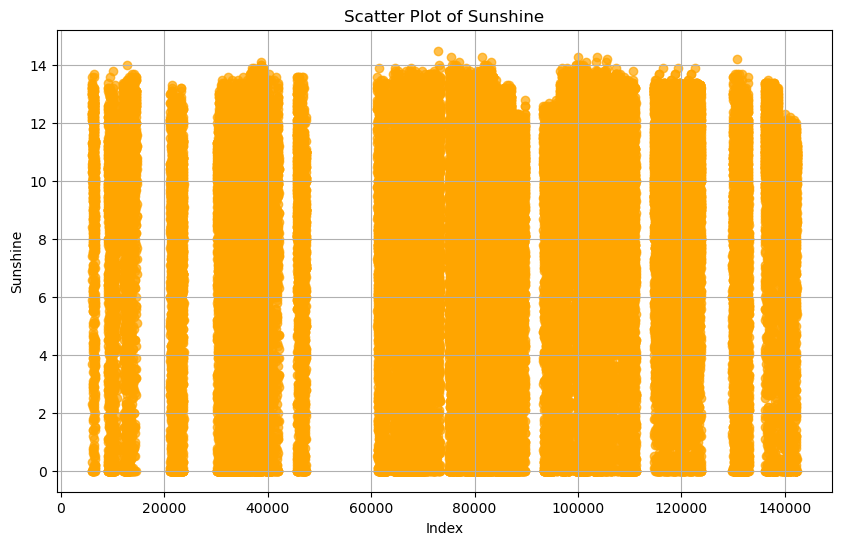

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset["Sunshine"], color='orange', alpha=0.7)

plt.title('Scatter Plot of Sunshine')
plt.xlabel('Index')
plt.ylabel('Sunshine')
plt.grid(True)
plt.show()

In [101]:
dataset["Sunshine"].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

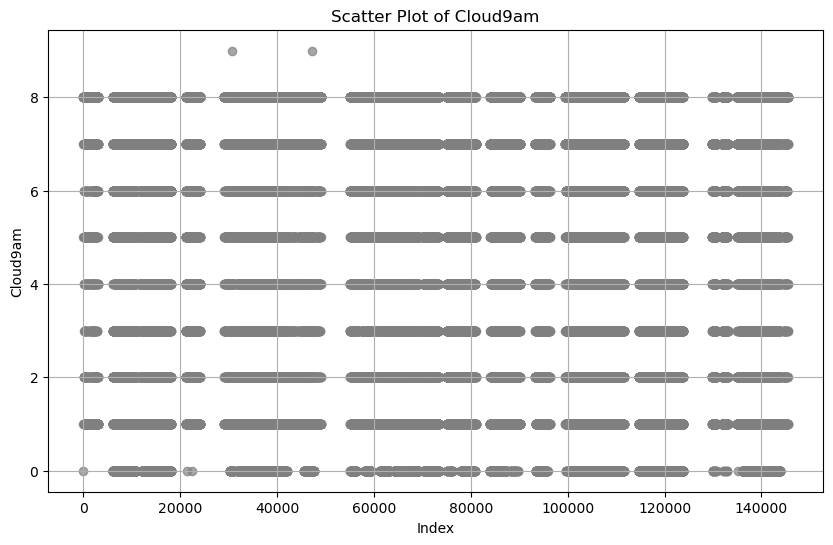

In [102]:
plt.figure(figsize=(10, 6)) 
plt.scatter(dataset.index, dataset["Cloud9am"], color='gray', alpha=0.7)

plt.title('Scatter Plot of Cloud9am')
plt.xlabel('Index')
plt.ylabel('Cloud9am')
plt.grid(True)
plt.show()

In [103]:
dataset["Cloud9am"].describe()

count    89572.000000
mean         4.447461
std          2.887159
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

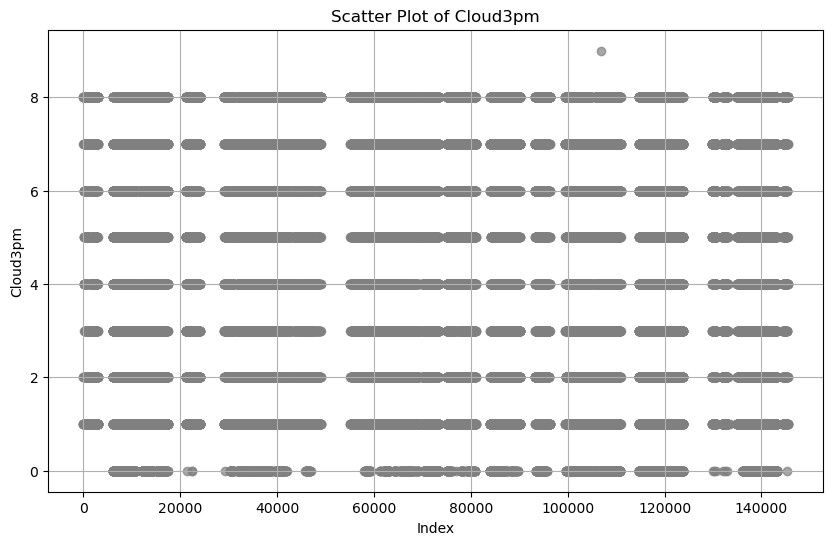

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset["Cloud3pm"], color='gray', alpha=0.7)

plt.title('Scatter Plot of Cloud3pm')
plt.xlabel('Index')
plt.ylabel('Cloud3pm')
plt.grid(True)
plt.show()

In [17]:
dataset["Cloud3pm"].describe()

count    86102.000000
mean         4.509930
std          2.720357
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

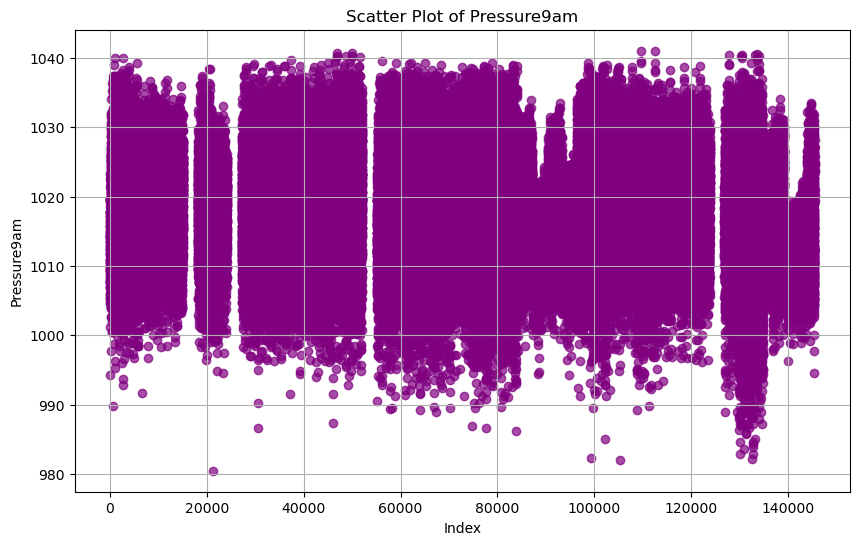

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset["Pressure9am"], color='purple', alpha=0.7)

plt.title('Scatter Plot of Pressure9am')
plt.xlabel('Index')
plt.ylabel('Pressure9am')
plt.grid(True)
plt.show()

In [105]:
dataset["Pressure9am"].describe()

count    130395.00000
mean       1017.64994
std           7.10653
min         980.50000
25%        1012.90000
50%        1017.60000
75%        1022.40000
max        1041.00000
Name: Pressure9am, dtype: float64

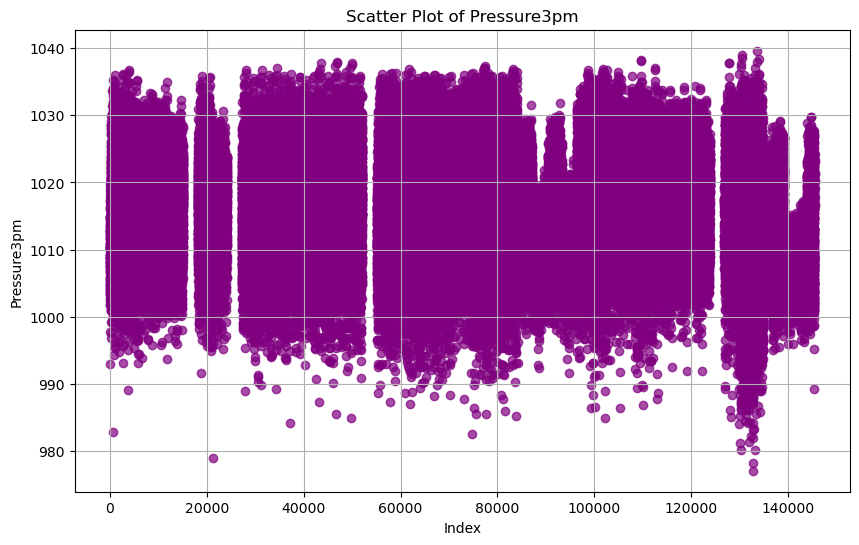

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset["Pressure3pm"], color='purple', alpha=0.7)

plt.title('Scatter Plot of Pressure3pm')
plt.xlabel('Index')
plt.ylabel('Pressure3pm')
plt.grid(True)
plt.show()

In [21]:
dataset["Pressure3pm"].describe()

count    130432.000000
mean       1015.255889
std           7.037414
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64

In [106]:
dataset["Evaporation"].fillna(dataset["Evaporation"].mean(), inplace=True)
dataset["Sunshine"].fillna(dataset["Sunshine"].mean(), inplace=True)
dataset["Cloud9am"].fillna(dataset["Cloud9am"].mean(), inplace=True)
dataset["Cloud3pm"].fillna(dataset["Cloud3pm"].mean(), inplace=True)
dataset["Pressure9am"].fillna(dataset["Pressure9am"].mean(), inplace=True)
dataset["Pressure3pm"].fillna(dataset["Pressure3pm"].mean(), inplace=True)
print(dataset.isnull().sum())

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [114]:
dataset = dataset.dropna()
print(dataset.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [108]:
categories = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
for cat in categories:
    print(dataset[cat].nunique())

16
16
16
2
2


In [109]:
labelEncoders = {}
for cat in categories: 
    labelEncoders[cat] = LabelEncoder()
    dataset[cat] = labelEncoders[cat].fit_transform(dataset[cat])

/var/folders/2s/215hpqj97z596q4gb3y3yglh0000gn/T/ipykernel_13818/3082856632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cat] = labelEncoders[cat].fit_transform(dataset[cat])
/var/folders/2s/215hpqj97z596q4gb3y3yglh0000gn/T/ipykernel_13818/3082856632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cat] = labelEncoders[cat].fit_transform(dataset[cat])
/var/folders/2s/215hpqj97z596q4gb3y3yglh0000gn/T/ipykernel_13818/3082856632.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [110]:
dataset.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [111]:
dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,5.468232,7.611178,0,31.0,2,0,15.0,...,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9,0,0
145455,2.8,23.4,0.0,5.468232,7.611178,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,3.6,25.3,0.0,5.468232,7.611178,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,5.4,26.9,0.0,5.468232,7.611178,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0


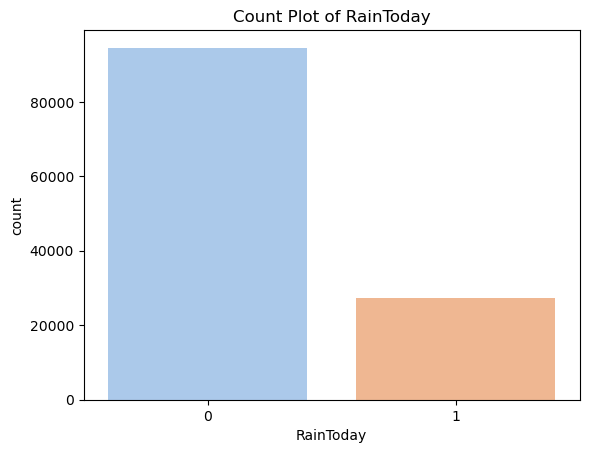

In [112]:
sns.countplot(x='RainToday', data=dataset, palette='pastel')
plt.title('Count Plot of RainToday')
plt.show()

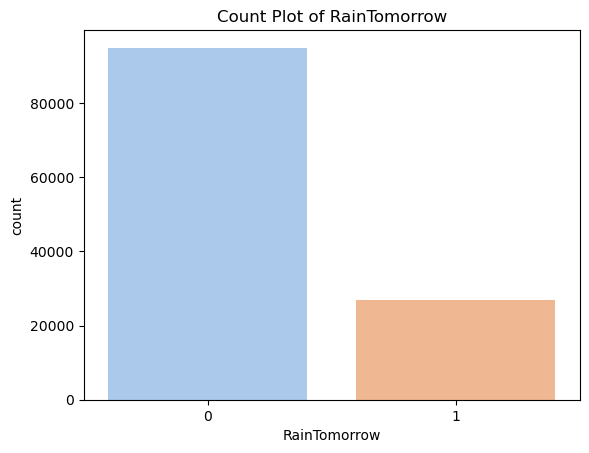

In [115]:
sns.countplot(x='RainTomorrow', data=dataset, palette='pastel')
plt.title('Count Plot of RainTomorrow')
plt.show()

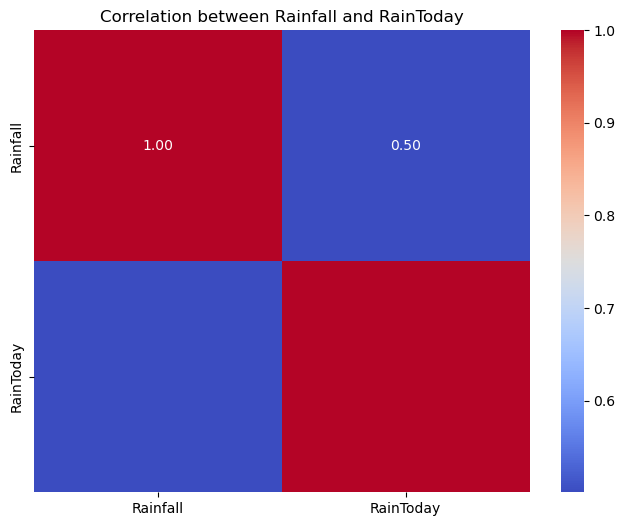

In [186]:
corr_matrix = dataset[["Rainfall", "RainToday"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Rainfall and RainToday')
plt.show()

In [185]:
columns_to_correlate = [col for col in dataset.columns if col != "RainTomorrow"]

correlation_results = dataset[columns_to_correlate].corrwith(dataset["RainToday"])

print(correlation_results)

MinTemp          0.044928
MaxTemp         -0.239148
Rainfall         0.501052
Evaporation     -0.150474
Sunshine        -0.246265
WindGustDir      0.133702
WindGustSpeed    0.153859
WindDir9am       0.171851
WindDir3pm       0.123821
WindSpeed9am     0.100257
WindSpeed3pm     0.086657
Humidity9am      0.375061
Humidity3pm      0.386352
Pressure9am     -0.182147
Pressure3pm     -0.101036
Cloud9am         0.246578
Cloud3pm         0.217886
Temp9am         -0.113951
Temp3pm         -0.244322
RainToday        1.000000
dtype: float64


In [184]:
correlation_results = dataset.corrwith(dataset["RainTomorrow"])
print(correlation_results)

MinTemp          0.078922
MaxTemp         -0.166291
Rainfall         0.238865
Evaporation     -0.094950
Sunshine        -0.339951
WindGustDir      0.048138
WindGustSpeed    0.235302
WindDir9am       0.029345
WindDir3pm       0.023796
WindSpeed9am     0.093249
WindSpeed3pm     0.096451
Humidity9am      0.273326
Humidity3pm      0.455048
Pressure9am     -0.235078
Pressure3pm     -0.216014
Cloud9am         0.258190
Cloud3pm         0.306046
Temp9am         -0.035488
Temp3pm         -0.199926
RainToday        0.313567
RainTomorrow     1.000000
dtype: float64


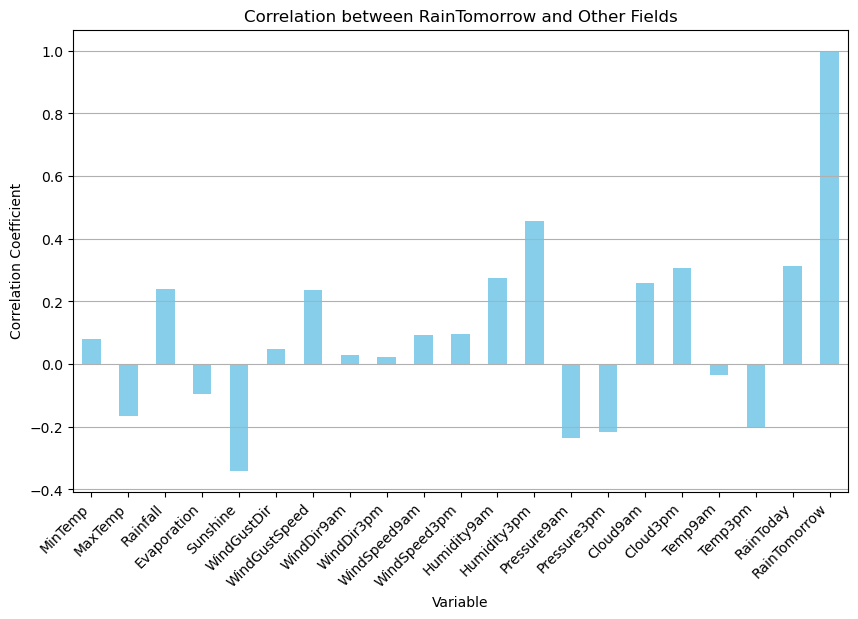

In [183]:
plt.figure(figsize=(10, 6))
correlation_results.plot(kind='bar', color='skyblue')
plt.title('Correlation between RainTomorrow and Other Fields')
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### 2. Podela podataka na trening i test skup i PCA

In [120]:
x = dataset.drop(["RainTomorrow"], axis=1)
y = dataset["RainTomorrow"]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [122]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [123]:
pca = PCA(n_components = 0.95)
pca.fit(x_train_std)
x_train_pca = pca.transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [174]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(109611, 14)
(12179, 14)


### 3. Podešavanje parametara

In [125]:
scorer = make_scorer(f1_score)

In [128]:
knn_parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 10, 11], 
    'metric':('euclidean', 'manhattan')
}
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_parameters, scoring=scorer, cv=5, verbose=3)
knn_grid_search.fit(x_train_std, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.539 total time=   6.6s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.539 total time=   6.6s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.536 total time=   6.5s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.540 total time=   7.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.547 total time=   6.5s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.572 total time=   6.6s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.576 total time=   7.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.567 total time=   6.8s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.571 total time=   6.5s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.574 total time=   6.7s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.580 total time=   6.7s
[CV 2/5] END ...metric=euclidean, n_neighbors=5;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': [1, 3, 5, 7, 9, 10, 11]},
             scoring=make_scorer(f1_score), verbose=3)

In [130]:
print("Best score for KNN without PCA: ", knn_grid_search.best_score_)
print("Best parameters for KNN without PCA: ", knn_grid_search.best_params_)

Best score for KNN without PCA:  0.5874590280848444
Best parameters for KNN without PCA:  {'metric': 'manhattan', 'n_neighbors': 9}


In [131]:
knn_classifier_pca = KNeighborsClassifier()
knn_grid_search_pca = GridSearchCV(knn_classifier_pca, knn_parameters, scoring=scorer, cv=5, verbose=3)
knn_grid_search_pca.fit(x_train_pca, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.526 total time=  12.3s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.524 total time=  12.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.520 total time=  12.0s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.522 total time=  12.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.518 total time=  11.9s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.560 total time=  16.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;, score=0.552 total time=  16.9s
[CV 3/5] END ...metric=euclidean, n_neighbors=3;, score=0.542 total time=  17.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=3;, score=0.559 total time=  17.0s
[CV 5/5] END ...metric=euclidean, n_neighbors=3;, score=0.552 total time=  17.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=5;, score=0.564 total time=  18.2s
[CV 2/5] END ...metric=euclidean, n_neighbors=5;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': [1, 3, 5, 7, 9, 10, 11]},
             scoring=make_scorer(f1_score), verbose=3)

In [132]:
print("Best score for KNN with PCA: ", knn_grid_search_pca.best_score_)
print("Best parameters for KNN with PCA: ", knn_grid_search_pca.best_params_)

Best score for KNN with PCA:  0.5665947868525719
Best parameters for KNN with PCA:  {'metric': 'manhattan', 'n_neighbors': 11}


In [138]:
logistic_parameters = {
    'penalty': ['l1', 'l2', 'None'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
}

In [139]:
logistic_classifier = LogisticRegression()
logistic_grid_search = GridSearchCV(logistic_classifier, logistic_parameters, scoring=scorer, cv=5, verbose=3)
logistic_grid_search.fit(x_train_std, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.565 total time=   0.3s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.580 total time=   0.3s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.572 total time=   0.2s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.578 total time=   0.3s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.577 total time=   0.2s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_mod

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring=make_scorer(f1_score), verbose=3)

In [140]:
print("Best score for Logistic Regression without PCA: ", logistic_grid_search.best_score_)
print("Best parameters for Logistic Regression without PCA: ", logistic_grid_search.best_params_)

Best score for Logistic Regression without PCA:  0.5964783508920976
Best parameters for Logistic Regression without PCA:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [141]:
logistic_classifier_pca = LogisticRegression()
logistic_grid_search_pca = GridSearchCV(logistic_classifier_pca, logistic_parameters, scoring=scorer, cv=5, verbose=3)
logistic_grid_search_pca.fit(x_train_pca, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.526 total time=   0.2s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.534 total time=   0.2s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.536 total time=   0.2s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.534 total time=   0.2s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.542 total time=   0.2s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_mod

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring=make_scorer(f1_score), verbose=3)

In [143]:
print("Best score for Logistic Regression with PCA: ", logistic_grid_search_pca.best_score_)
print("Best parameters for Logistic Regression with PCA: ", logistic_grid_search_pca.best_params_)

Best score for Logistic Regression with PCA:  0.5646000181743351
Best parameters for Logistic Regression with PCA:  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [144]:
tree_parameters = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [145]:
tree_classifier = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(tree_classifier, tree_parameters, scoring=scorer, cv=5, verbose=3)
tree_grid_search.fit(x_train_std, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.533 total time=   1.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.540 total time=   1.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.536 total time=   1.3s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.535 total time=   1.3s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.527 total time=   1.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.530 total time=   1.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.542 total time=   1.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.530 total time=   1.4s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.532 total time=   1.4s
[CV 5/5] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score), verbose=3)

In [149]:
print("Best score for Decision Tree without PCA: ", tree_grid_search.best_score_)
print("Best parameters for Decision Tree without PCA: ", tree_grid_search.best_params_)

Best score for Decision Tree without PCA:  0.5778509927544052
Best parameters for Decision Tree without PCA:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [150]:
tree_classifier_pca = DecisionTreeClassifier()
tree_grid_search_pca = GridSearchCV(tree_classifier_pca, tree_parameters, scoring=scorer, cv=5, verbose=3)
tree_grid_search_pca.fit(x_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.495 total time=   2.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.499 total time=   2.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.495 total time=   2.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.495 total time=   2.9s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.493 total time=   2.8s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.493 total time=   2.7s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.501 total time=   2.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.493 total time=   2.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.495 total time=   2.7s
[CV 5/5] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score), verbose=3)

In [153]:
print("Best score for Decision Tree with PCA: ", tree_grid_search_pca.best_score_)
print("Best parameters for Decision Tree with PCA: ", tree_grid_search_pca.best_params_)

Best score for Decision Tree with PCA:  0.5314979695047354
Best parameters for Decision Tree with PCA:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


### 4. Finalno obučavanja modela

In [154]:
# Best parameters for KNN
knn_params = {'metric': 'manhattan', 'n_neighbors': 9}
knn_params_pca = {'metric': 'manhattan', 'n_neighbors': 11}

# Best parameters for Logistic Regression
logistic_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
logistic_params_pca = {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

# Best parameters for Decision Tree
tree_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
tree_params_pca = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

final_knn_classifier = KNeighborsClassifier(**knn_params)
final_knn_classifier_pca = KNeighborsClassifier(**knn_params_pca)
final_logistic_classifier = LogisticRegression(**logistic_params)
final_logistic_classifier_pca = LogisticRegression(**logistic_params_pca)
final_tree_classifier = DecisionTreeClassifier(**tree_params)
final_tree_classifier_pca = DecisionTreeClassifier(**tree_params_pca)

final_knn_classifier.fit(x_train_std, y_train)
final_knn_classifier_pca.fit(x_train_pca, y_train)
final_logistic_classifier.fit(x_train_std, y_train)
final_logistic_classifier_pca.fit(x_train_pca, y_train)
final_tree_classifier.fit(x_train_std, y_train)
final_tree_classifier_pca.fit(x_train_pca, y_train)

knn_predictions = final_knn_classifier.predict(x_test_std)
knn_predictions_pca = final_knn_classifier_pca.predict(x_test_pca)
logistic_predictions = final_logistic_classifier.predict(x_test_std)
logistic_predictions_pca = final_logistic_classifier_pca.predict(x_test_pca)
tree_predictions = final_tree_classifier.predict(x_test_std)
tree_predictions_pca = final_tree_classifier_pca.predict(x_test_pca)

# Evaluate
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("KNN PCA Classification Report:")
print(classification_report(y_test, knn_predictions_pca))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("Logistic Regression PCA Classification Report:")
print(classification_report(y_test, logistic_predictions_pca))

print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))

print("Decision Tree PCA Classification Report:")
print(classification_report(y_test, tree_predictions_pca))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9494
           1       0.72      0.49      0.59      2685

    accuracy                           0.85     12179
   macro avg       0.80      0.72      0.75     12179
weighted avg       0.84      0.85      0.84     12179

KNN PCA Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9494
           1       0.71      0.48      0.57      2685

    accuracy                           0.84     12179
   macro avg       0.79      0.71      0.74     12179
weighted avg       0.83      0.84      0.83     12179

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9494
           1       0.74      0.51      0.61      2685

    accuracy                           0.85     12179
   macro avg       0.81    

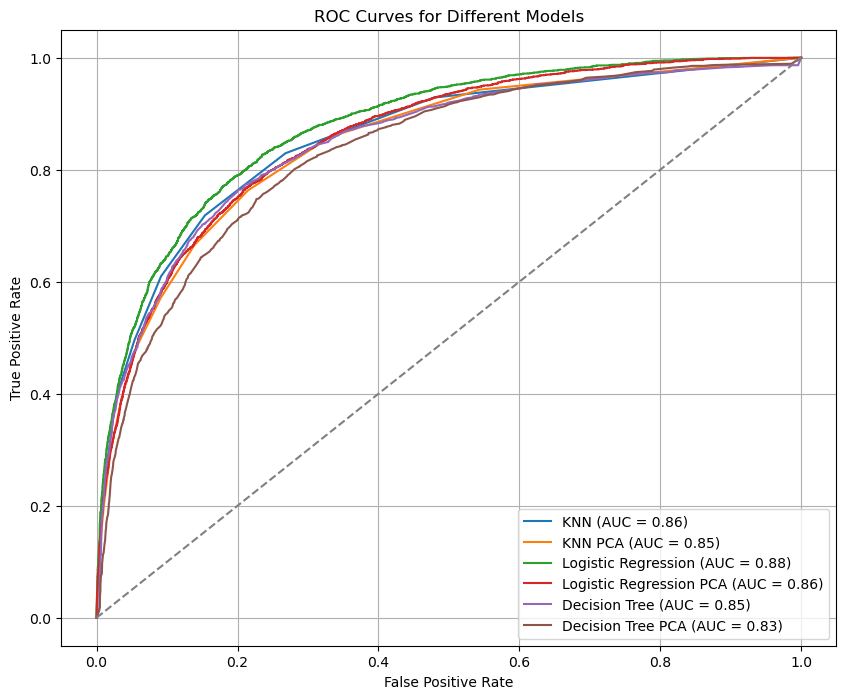

<Figure size 640x480 with 0 Axes>

In [187]:
def plot_roc_curve(model, name, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc_score = roc_auc_score(y, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

final_models = [
    (final_knn_classifier, 'KNN'),
    (final_knn_classifier_pca, 'KNN PCA'),
    (final_logistic_classifier, 'Logistic Regression'),
    (final_logistic_classifier_pca, 'Logistic Regression PCA'),
    (final_tree_classifier, 'Decision Tree'),
    (final_tree_classifier_pca, 'Decision Tree PCA')
]

plt.figure(figsize=(10, 8))

for model, name in final_models:
    if 'PCA' in name:
        plot_roc_curve(model, name, x_test_pca, y_test)
    else:
        plot_roc_curve(model, name, x_test_std, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("aucroc.png")

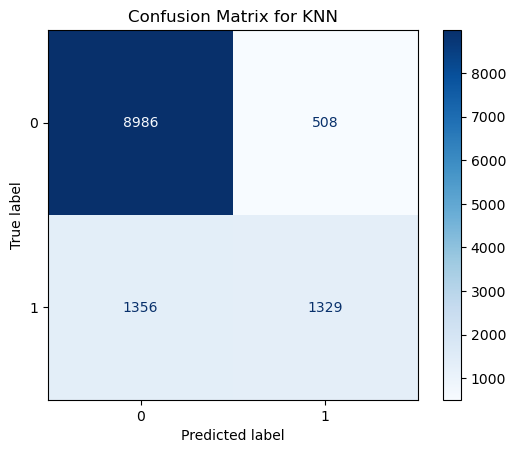

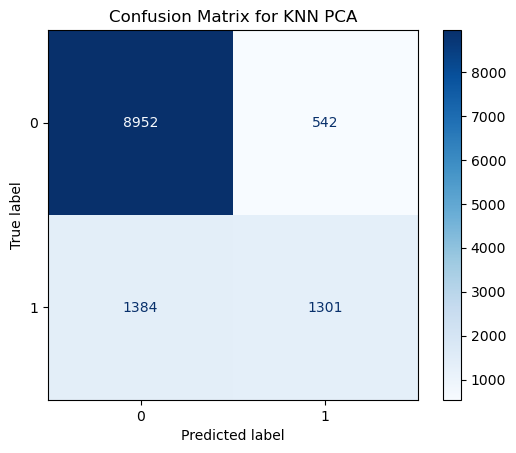

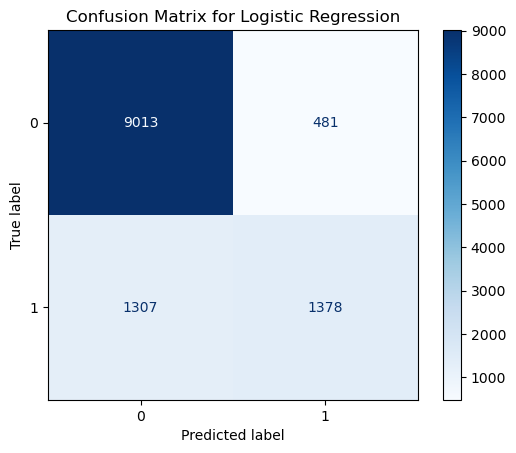

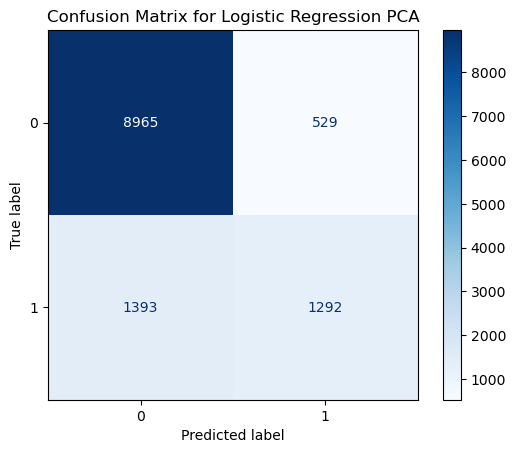

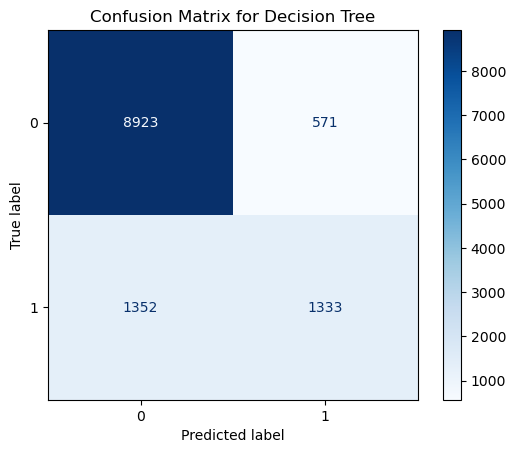

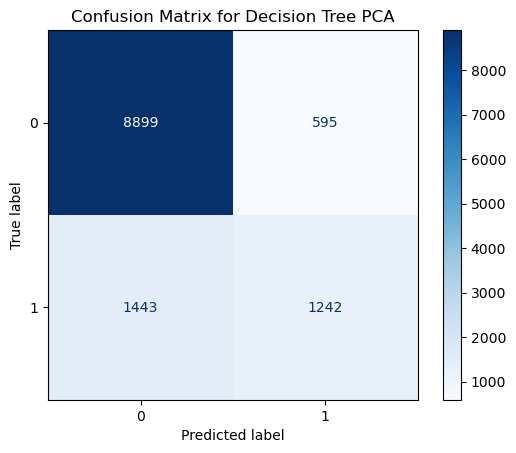

In [180]:
def plot_confusion_matrix(model, name, X, y):
    y_pred = model.predict(X)
    
    cm = confusion_matrix(y, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')

for model, name in final_models:
    if 'PCA' in name:
        plot_confusion_matrix(model, name, x_test_pca, y_test)
    else:
        plot_confusion_matrix(model, name, x_test_std, y_test)